# Error analysis

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 8)
sns.set_theme(context="notebook", style="whitegrid")

## Config

In [2]:
# file paths
INPUT_DIR = Path("../input")

OUTPUT_DIR = Path("../output")

# data
TRAIN_DATA = INPUT_DIR / "train.csv"

# columns in the data
INDEX_COL = "Transaction_ID"

TARGET_COL = "MERCHANT_CATEGORIZED_AS"

# random state
RANDOM_STATE = 98765

## Obtain actual and predicted labels

In [3]:
train_df = pd.read_csv(TRAIN_DATA, index_col=INDEX_COL)
y = train_df[TARGET_COL]

In [4]:
def get_predictions(run_id: str) -> pd.Series:
    """Obtain predictions from a specified model run"""
    predictions_file = OUTPUT_DIR / "predictions" / f"{run_id}_train.csv"
    return pd.read_csv(predictions_file, index_col=INDEX_COL)

## Analysis

In [5]:
# helper function
from sklearn.metrics import ConfusionMatrixDisplay


def plot_confusion_matrix(run_id: str) -> None:
    """Plot a confusion matrix for a specified model run"""
    y_pred = get_predictions(run_id)

    # show disparities
    df = y_pred.join(y, lsuffix="pred")
    df.columns = ["predicted", "actual"]
    display(df.query("predicted != actual"))

    # plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y, y_pred, xticks_rotation="vertical")

,predicted,actual
Transaction_ID,,
ID_04mk78fa,Bills & Fees,Rent / Mortgage
ID_04xkfb07,Bills & Fees,Transport & Fuel
ID_051urwuw,Bills & Fees,Data & WiFi
ID_0e1om7rz,Bills & Fees,Loan Repayment
ID_0ntvo3wr,Bills & Fees,Miscellaneous
...,...,...
ID_zh4nw2s0,Bills & Fees,Family & Friends
ID_zr5x8yjs,Bills & Fees,Miscellaneous
ID_zty81sq8,Bills & Fees,Miscellaneous


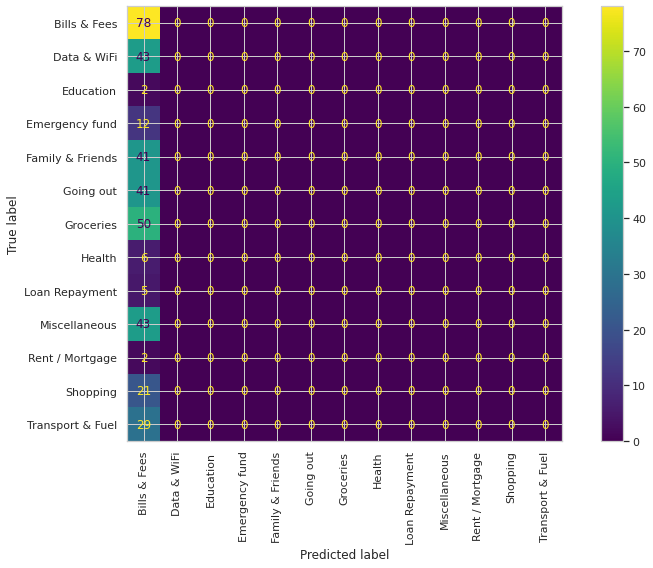

In [6]:
# baseline classifier
plot_confusion_matrix("6cd3fd07fc21433e8f9946747b3e7dc6")

,predicted,actual
Transaction_ID,,
ID_5h20hq1z,Bills & Fees,Emergency fund
ID_iabzbcw4,Groceries,Transport & Fuel
ID_js46768k,Bills & Fees,Family & Friends


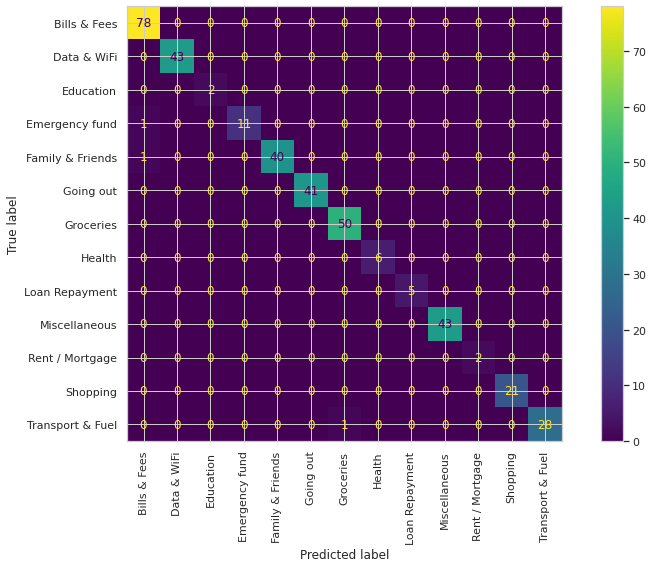

In [7]:
# histogram-based GBT
plot_confusion_matrix("71e0f0e65613406d88c6e63129f8b5e5")

,predicted,actual
Transaction_ID,,
ID_iabzbcw4,Groceries,Transport & Fuel
ID_js46768k,Bills & Fees,Family & Friends


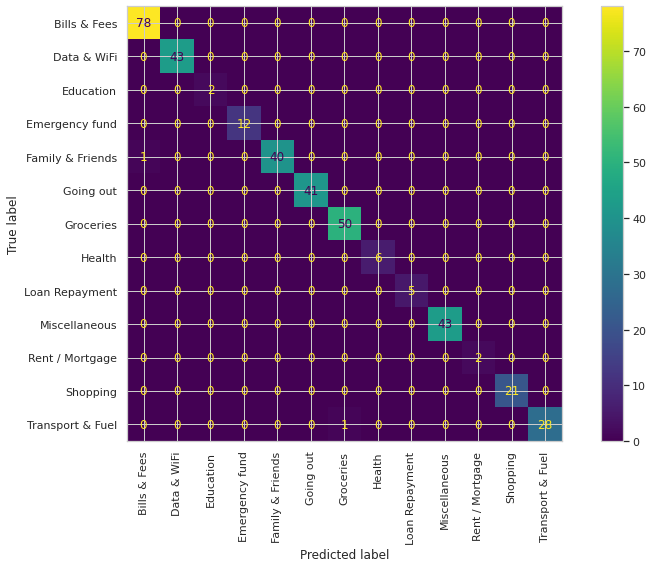

In [8]:
# LightGBM
plot_confusion_matrix("7caceff48db9434695cc7850f11347af")

,predicted,actual
Transaction_ID,,
ID_4sff4xaz,Bills & Fees,Miscellaneous
ID_5h20hq1z,Bills & Fees,Emergency fund
ID_a59qq7bf,Data & WiFi,Health
ID_fntcympe,Groceries,Family & Friends
ID_fnv6kv1p,Data & WiFi,Miscellaneous
ID_iabzbcw4,Groceries,Transport & Fuel
ID_js46768k,Bills & Fees,Family & Friends
ID_r51hz6if,Going out,Transport & Fuel


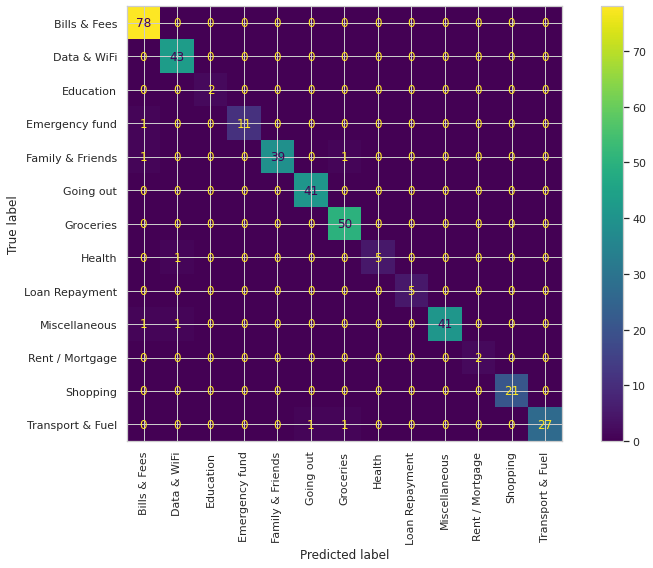

In [9]:
# CatBoost
plot_confusion_matrix("5a150d8abae84d87944a3c947a14f68b")